In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
pd.options.display.float_format = "{:.4f}".format
# load train and test file as pandas dataframe
titanic_train_org = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic_test = pd.read_csv('/kaggle/input/titanic/test.csv')
print("The csv files are loaded as Dataframe.")

The csv files are loaded as Dataframe.


In [3]:
# copy the data and play with duplicate 
train = titanic_train_org.copy()

In [4]:
# Analyzing the data 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [7]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.0000
Fare           0.2573
Parch          0.0816
PassengerId   -0.0050
SibSp         -0.0353
Age           -0.0772
Pclass        -0.3385
Name: Survived, dtype: float64

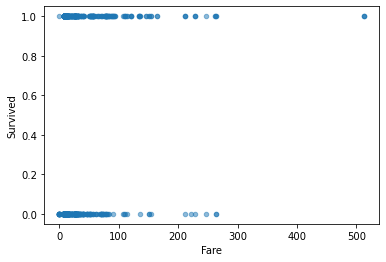

In [8]:
# Let's explore now
train.plot(kind="scatter", x = "Fare", y ="Survived", alpha= 0.5)
#splitt train set to validation and actual train set using cross validation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2beab2b90>,
      dtype=object)

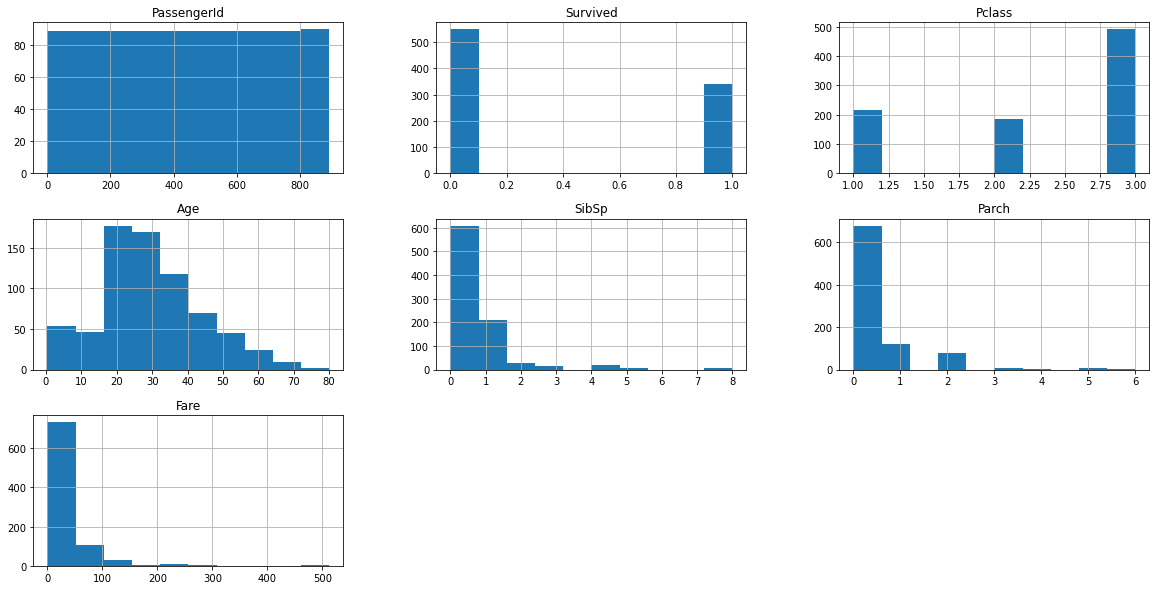

In [9]:
train.hist(bins=10, figsize=(20,10))

In [10]:
# lets see how target value is distributed
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
# to see these conunt value in percentage 
train.Survived.value_counts(normalize=True)

0   0.6162
1   0.3838
Name: Survived, dtype: float64

In [12]:
# want to see how the sex distribution is
# I want my features to be categorised first
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#first I need a column of attributes that should be encoded 
cat_attrubutes = train["Sex"]
label_encoder = LabelEncoder()
cat_attrubutes_encoded = label_encoder.fit_transform(cat_attrubutes)
print(label_encoder.classes_)
#cat_attrubutes_encoded
#oh_encoder = OneHotEncoder()
#sex_encoded


['female' 'male']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2b714c890>,
      dtype=object)

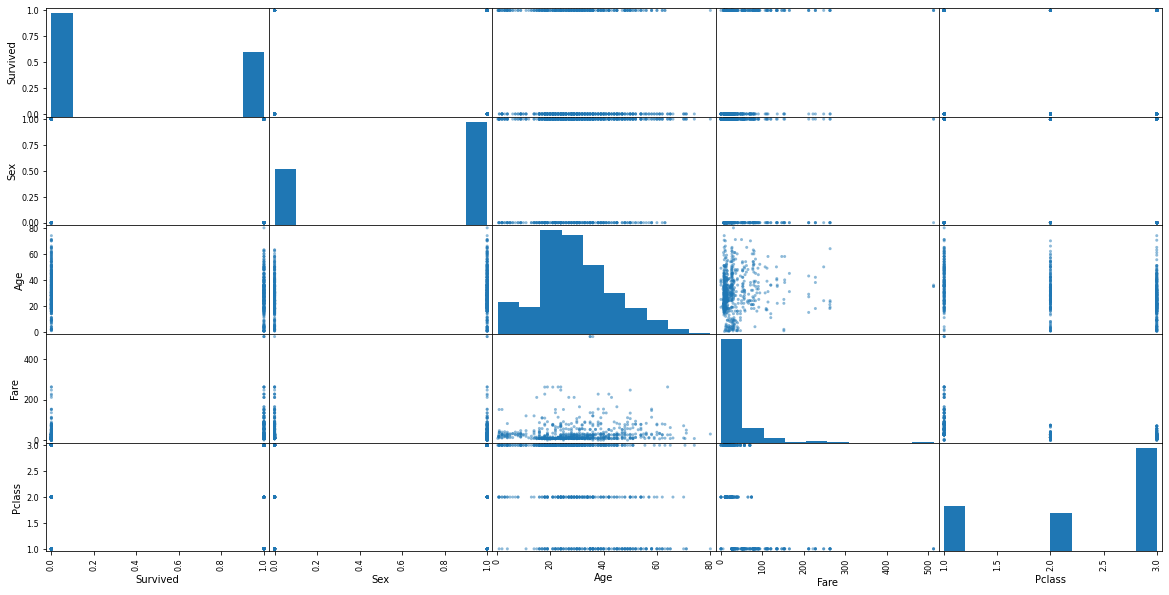

In [13]:
# Now I want to drop the original column and put the new encoded column in my data 
from pandas.plotting import scatter_matrix

train["Sex"] = cat_attrubutes_encoded
# scatter matrix to find the realation 
my_features = ["Survived", "Sex", "Age", "Fare", "Pclass"]
scatter_matrix(train[my_features], figsize=(20,10))
# scatter matrix is a bad choice for classification

In [14]:
# What I am actually trying to achieve
# I want to see the ration of surviving male and female
# relationship between class and surviving 
train.Survived.where(train["Sex"] == 1).value_counts()

0.0000    468
1.0000    109
Name: Survived, dtype: int64

In [15]:
train.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [16]:
# before filling up the missing vlaues, check about the data 
train.Age.where(train["Survived"] == 1).value_counts()
# should I fill with median value or should I wrtie 

24.0000    15
36.0000    11
35.0000    11
27.0000    11
22.0000    11
           ..
7.0000      1
32.5000     1
12.0000     1
0.6700      1
0.4200      1
Name: Age, Length: 65, dtype: int64

In [17]:
# Age and survival relationship 
age_survive_rln = train.Age.where(train["Survived"] == 0).value_counts()
age_survive_rln



21.0000    19
28.0000    18
25.0000    17
18.0000    17
22.0000    16
           ..
74.0000     1
32.5000     1
36.5000     1
55.5000     1
70.5000     1
Name: Age, Length: 77, dtype: int64

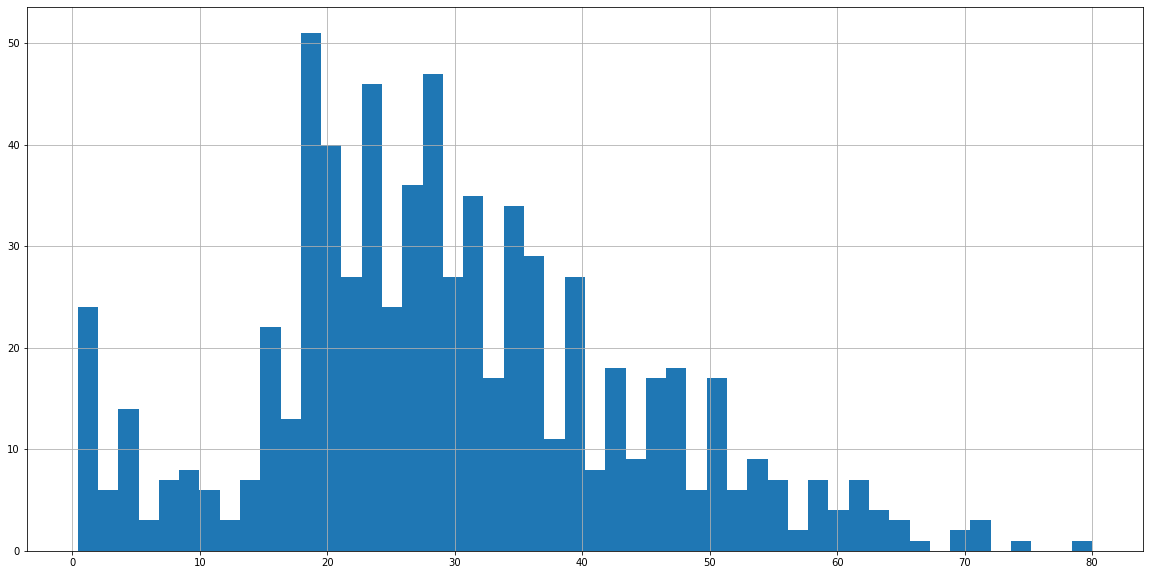

In [18]:
# its important to see how age is distributed 
train["Age"].hist(bins=50, figsize=(20,10))

In [19]:

# I want to see age distributition according to survival
train["survived_Age"] = train["Age"].where(train["Survived"] == 1)
train["died_Age"] = train["Age"].where(train["Survived"] == 0)

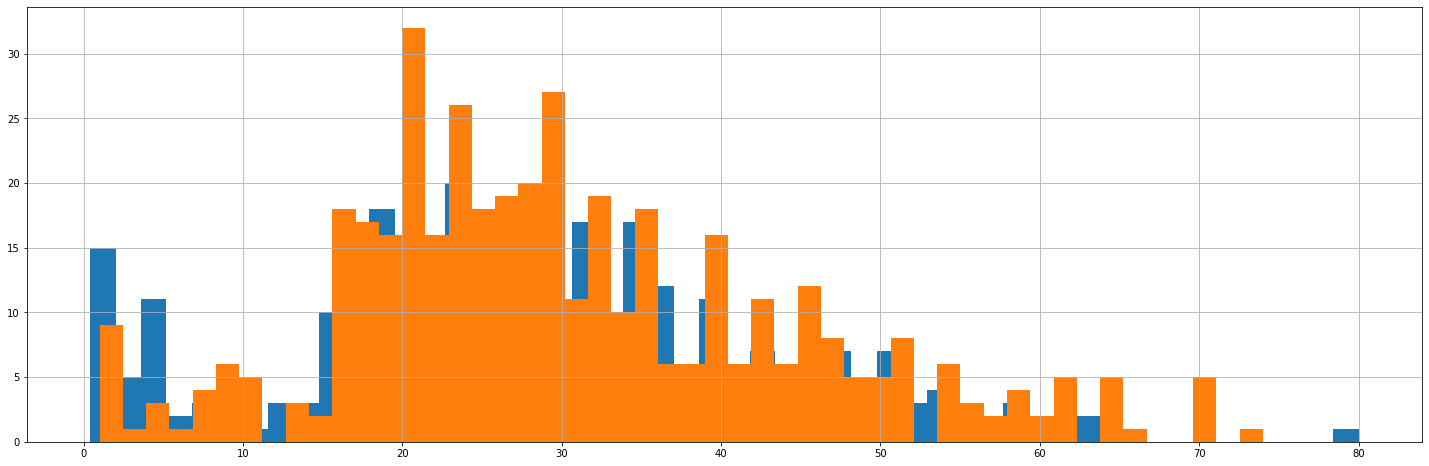

In [20]:
train["survived_Age"].hist(bins=50, figsize=(20,8))
train["survived_Age"].mean()
train["died_Age"].hist(bins=50, figsize=(25,8))

In [21]:
# compare target column with sex column
pd.crosstab(train.Survived, train.Sex)

Sex,0,1
Survived,,
0,81,468
1,233,109


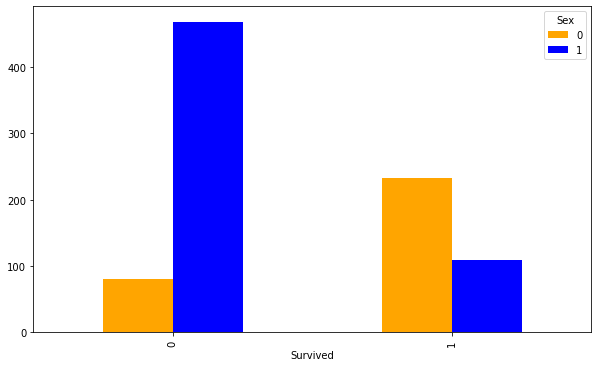

In [22]:
# visual comparision
pd.crosstab(train.Survived, train.Sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["orange", "blue"]);

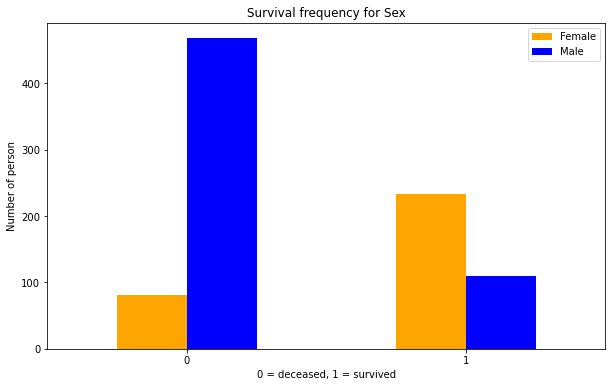

In [23]:
# to make the visual even more better with title and other label
import matplotlib.pyplot as plt 
pd.crosstab(train.Survived, train.Sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["orange", "blue"]);

plt.title("Survival frequency for Sex")
plt.xlabel("0 = deceased, 1 = survived")
plt.ylabel("Number of person")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

Text(0, 0.5, 'Fare')

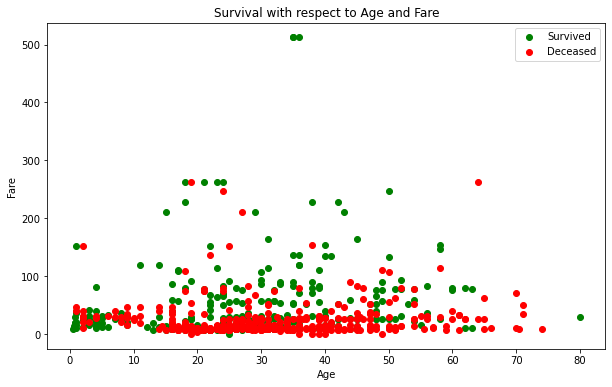

In [24]:
# Create another figure
plt.figure(figsize=(10,6))

# male of different age who survived 
plt.scatter(train.Age[train.Survived==1], 
            train.Fare[train.Survived==1], 
            c="green") # define it as a scatter figure

# Man of different age who died 
plt.scatter(train.Age[train.Survived==0], 
            train.Fare[train.Survived==0], 
            c="red") # axis always come as (x, y)

# Add some helpful info
plt.title("Survival with respect to Age and Fare")
plt.xlabel("Age")
plt.legend(["Survived", "Deceased"])
plt.ylabel("Fare")

Text(0, 0.5, 'Pclass')

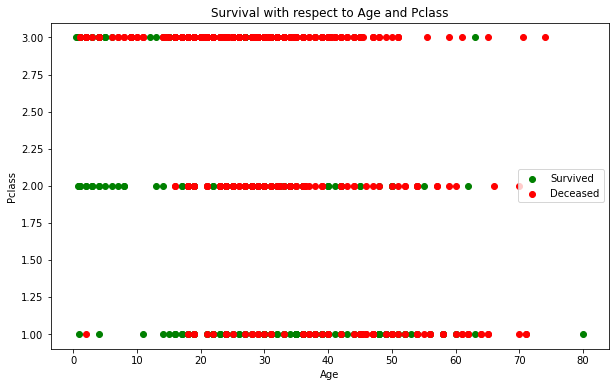

In [25]:
# Survival with respect to sex and fare 
plt.figure(figsize=(10,6))

# male of different age who survived 
plt.scatter(train.Age[train.Survived==1], 
            train.Pclass[train.Survived==1], 
            c="green") # define it as a scatter figure

# Man of different age who died 
plt.scatter(train.Age[train.Survived==0], 
            train.Pclass[train.Survived==0], 
            c="red") # axis always come as (x, y)

# Add some helpful info
plt.title("Survival with respect to Age and Pclass")
plt.xlabel("Age")
plt.legend(["Survived", "Deceased"])
plt.ylabel("Pclass")

Text(0, 0.5, 'Pclass')

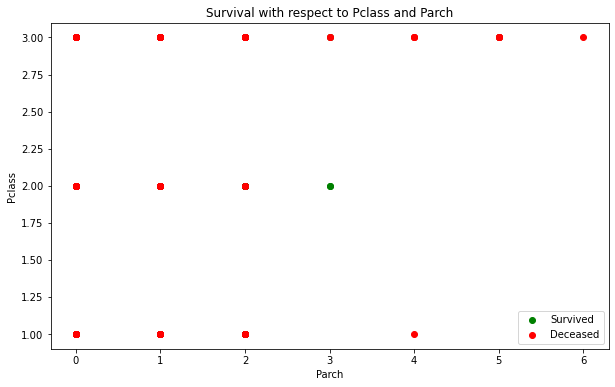

In [26]:
# Survival with respect to sex and fare 
plt.figure(figsize=(10,6))

# male of different age who survived 
plt.scatter(train.Parch[train.Survived==1], 
            train.Pclass[train.Survived==1], 
            c="green") # define it as a scatter figure

# Man of different age who died 
plt.scatter(train.Parch[train.Survived==0], 
            train.Pclass[train.Survived==0], 
            c="red") # axis always come as (x, y)

# Add some helpful info
plt.title("Survival with respect to Pclass and Parch")
plt.xlabel("Parch")
plt.legend(["Survived", "Deceased"])
plt.ylabel("Pclass")

In [27]:
drop_features = ["PassengerId", "Age", "Name", "Cabin", "died_Age", "survived_Age", "Ticket"]
train_cut = train.drop(drop_features, axis = 1)
train_cut.head()
#corr_matrix = train_cut.corr()
#corr_matrix["Survived"].sort_values(ascending=False)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,S
1,1,1,0,1,0,71.2833,C
2,1,3,0,0,0,7.9250,S
3,1,1,0,1,0,53.1000,S
4,0,3,1,0,0,8.0500,S


In [28]:
#train_cut.loc[train_cut.isnull().any(axis=1)]
df = train_cut.drop([61,829])

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_list):
        self.attribute_list = attribute_list
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_list].values

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_attributes = ["SibSp", "Parch", "Fare"]
cat_attributes = ["Pclass", "Sex", "Embarked"]
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attributes)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scalar', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attributes)),
        ('one_hot_encoder', OneHotEncoder(sparse=False)),
    ])

In [31]:
# joining both pipelines 
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])



# it still a numpy array of the shape 
df.head()

X = full_pipeline.fit_transform(df).copy()
y = df["Survived"].copy()
#ddf = full_pipeline.fit_transform(df)
#np.where(ddf.any >= np.finfo(np.float64).max)
##
#label = df["Survived"].copy()

In [32]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

In [34]:
def fit_and_score(models, X_train, y_train):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    y_train : training label
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=3)
    return model_scores

In [35]:
model_scores = fit_and_score(models=models,
                             X_train=X,
                             y_train=y
                            )
model_scores

NameError: name 'cross_val_score' is not defined

In [36]:
from sklearn.model_selection import GridSearchCV

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X, y);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [37]:

tit_cut = titanic_test.drop(["Cabin", "Age"], axis= 1)
tit_cut.loc[tit_cut.isnull().any(axis=1)]
tit_cut.iloc[152]
print("Length before: ", len(tit_cut))
ultimate_test = tit_cut.copy()
#test_final = tit_cut.drop(152)
#print("Length before: ", len(tit_cut))
#print("Length of test_final: ", len(test_final))
#test_final.loc[test_final.isnull().any(axis=1)]
#test_final.round(5)
test_now = full_pipeline.fit_transform(ultimate_test).copy()
test_now[152]
#test_some = test_now[153:]
#gs_log_reg.predict(test_some)
#test_final.loc[test_now.isnull().any(axis=1)]
#test_now.shape
predictions = gs_log_reg.predict(test_now)
len(predictions)
#pred = sgd_clf.predict(test_now)

Length before:  418


418

In [38]:
# time for first submissions
my_submission = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)
